<a href="https://colab.research.google.com/github/vishakhakumari0598/-NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NETFLIX MOVIES AND TV SHOWS CLUSTERING** - Unsupervised ML Capstone Project

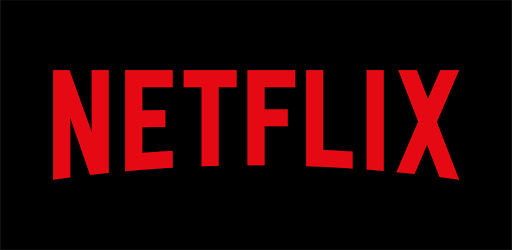

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **1. Exploratory Data Analysis**

## **Understanding Dataset**

**Importing Libraries**

In [8]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from pandas import set_option
plt.style.use('ggplot') # nice plots
from matplotlib.pyplot import figure

**sklearn**

In [9]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')


In [10]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

**Mounting google drive**

In [11]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading our dataset**

In [12]:
# Loading our dataset from gogle drive and creating a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [13]:
# Exploring first 5 rows for better understanding of data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
# Curiously exploring last 5 rows of dataset using tail()
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


Exploring features name

In [15]:
# Getting feature names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
# Looking for total no. of observations and features
df.shape

(7787, 12)

We have around 7787 rows of records and 12 features.

In [17]:
# Checking info our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Here we can see that most of data in object format.

And there are some features are missing some of the records.

## **Data Cleaning**

**Missing values**

In [18]:
# looking out exact missing values in our dataset in every features using isnull()
df.isnull().sum().sort_values(ascending=False)[:6]

director      2389
cast           718
country        507
date_added      10
rating           7
show_id          0
dtype: int64

We have 5 following features having missing values
1. director
2. cast
3. country
4. date_added
5. rating

**Duplicated Values**

In [19]:
# we will use duplicated for checking duplicate values
df.duplicated().sum()

0

**Making a copy of our dataframe for further operations**

In [20]:
#creating copy of dataset before working with it so that we can have original data untouched
df_1 = df.copy()

**Filling null values with "unknown"**

In [21]:
# Filling all the missing values with unknown
df_1.fillna("Unknown",inplace=True)

In [22]:
# checking again after filling null values
df_1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

we have filled missing values with **unknown.**

### **Descriptive Staistics**

In [23]:
# we will check numerical columns
df_1.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


We can say very old content on netflix was released in 1925, most of the content released in 2017.

In [24]:
# Checking data types again
df_1.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## **Data Visualization**

### **Some Feature Engineering required For Data Visualization**

converting date_added column datatype to datetime

In [25]:
# Getting records from date_added column excluding 'unknown'
df_1 = df_1.loc[df_1['date_added']!= 'Unknown']

checking shape again

In [26]:
df_1.shape

(7777, 12)

In [27]:
# converting date_added column to datetime
df_1['date_added'] = pd.to_datetime(df_1['date_added'])

In [28]:
# Crosschecking
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.9+ KB


our date_added column successfully converted into datetime type

Now we will extract Year, month and date from date_added column and create seperate columns for each for ease of operations.

In [29]:
# Creating 'year' column
df_1['added_year'] = df_1['date_added'].dt.year


In [30]:
# month
df_1['added_month'] = df_1['date_added'].dt.month


In [31]:
# day
df_1['added_day'] = df_1['date_added'].dt.day


renaming **'listed_in'** column to **'genres'.**

In [32]:
# first we rename the column for sake of simplicity
df_1.rename(columns={'listed_in':'genres'},inplace=True)

we will drop column 'date_added' as we create seperate columns for it according to year and month

In [33]:
# Dropping 'date_added' as we create seperate columns
df_1.drop(columns="date_added",axis=1,inplace=True)

Lets check all is going well or not...?

In [34]:
# Checking first 5 rows of our dataset
df_1.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,genres,description,added_year,added_month,added_day
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


Okay till here everything is going good.....!

## **Univariate Analysis**

Type of show means movies/TV shows

In [35]:
# checking how many tv shows and movies are there
df_1['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

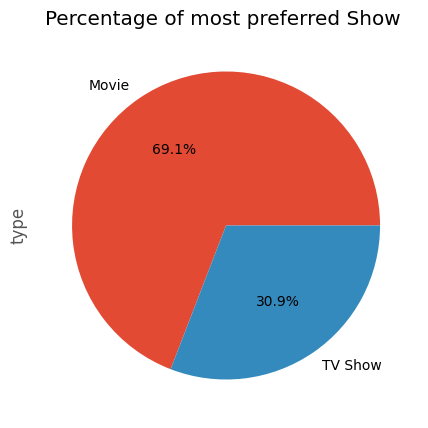

In [36]:
# Pie chart for type of shows
plt.figure(figsize=(5,5))
df_1['type'].value_counts().plot(kind='pie',autopct ='%0.1f%%')
plt.title('Percentage of most preferred Show ');

**In our dataset we have around 69% content as movies and remaining 31% as TV shows.**

**Here we have more numberes of Movies than TV shows**

## **Genres**

In [37]:
# Copying main dataframe for exploring genres
genres_explore = df_1.copy()

In [38]:
# we will split genres column
genres_explore = pd.concat([genres_explore, df_1["genres"].str.split(",", expand = True)], axis = 1)

In [39]:
# Melting the required features
genres_explore = genres_explore.melt(id_vars = ['type','title'], value_vars=range(3),value_name="genres")
genres_explore = genres_explore[genres_explore['genres'].notna()]
genres_explore

,type,title,variable,genres
0,TV Show,3%,0,International TV Shows
1,Movie,7:19,0,Dramas
2,Movie,23:59,0,Horror Movies
3,Movie,9,0,Action & Adventure
4,Movie,21,0,Dramas
...,...,...,...,...
23321,TV Show,Zombie Dumb,2,TV Comedies
23323,TV Show,Zona Rosa,2,Stand-Up Comedy & Talk Shows
23324,Movie,Zoo,2,International Movies
23327,Movie,Zubaan,2,Music & Musicals


In [40]:
# counting top 30 genres by occurence
genres_explore['genres'].value_counts()[:30]

 International Movies         2323
Dramas                        1384
Comedies                      1074
Documentaries                  751
 Dramas                        722
Action & Adventure             721
International TV Shows         689
 Independent Movies            653
 TV Dramas                     641
 Romantic Movies               528
 International TV Shows        509
Children & Family Movies       502
 Thrillers                     442
 TV Comedies                   409
 Comedies                      397
Crime TV Shows                 369
Kids' TV                       357
Stand-Up Comedy                321
 Romantic TV Shows             305
 Music & Musicals              304
Horror Movies                  244
British TV Shows               231
 Sci-Fi & Fantasy              207
 Sports Movies                 195
Docuseries                     193
 Docuseries                    159
 Korean TV Shows               150
Anime Series                   147
 Spanish-Language TV

In [41]:
# Stripping the equired records
genres_explore['genres']=genres_explore['genres'].str.strip()
genres_explore['genres'].value_counts()[:20]

International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1198
Documentaries                786
Action & Adventure           721
TV Dramas                    703
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
TV Comedies                  518
Thrillers                    491
Crime TV Shows               426
Kids' TV                     412
Docuseries                   352
Romantic TV Shows            333
Stand-Up Comedy              329
Music & Musicals             321
Horror Movies                312
British TV Shows             231
Name: genres, dtype: int64

### **Top 20 Genres**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'International TV Shows'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, 'Action & Adventure'),
  Text(6, 0, 'TV Dramas'),
  Text(7, 0, 'Independent Movies'),
  Text(8, 0, 'Children & Family Movies'),
  Text(9, 0, 'Romantic Movies'),
  Text(10, 0, 'TV Comedies'),
  Text(11, 0, 'Thrillers'),
  Text(12, 0, 'Crime TV Shows'),
  Text(13, 0, "Kids' TV"),
  Text(14, 0, 'Docuseries'),
  Text(15, 0, 'Romantic TV Shows'),
  Text(16, 0, 'Stand-Up Comedy'),
  Text(17, 0, 'Music & Musicals'),
  Text(18, 0, 'Horror Movies'),
  Text(19, 0, 'British TV Shows')])

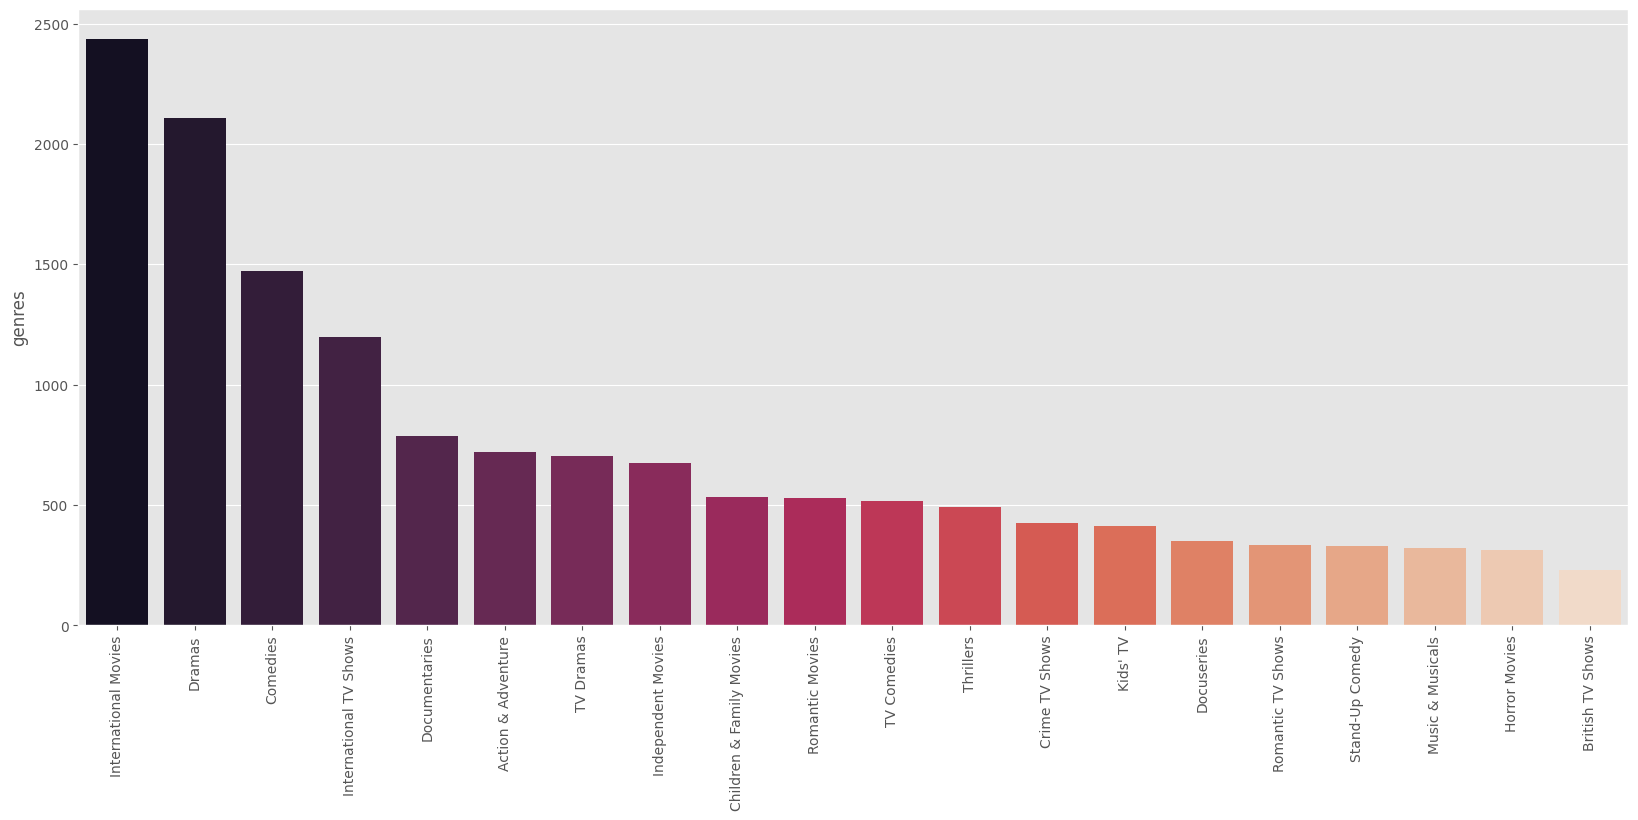

In [42]:
# Plotting a barplot for getting top 20 genres
plt.figure(figsize = (20, 8))
listed_in = genres_explore["genres"].value_counts()[:20]
sns.barplot(y = listed_in, x = listed_in.index, palette='rocket')
plt.xticks(rotation=90)


Here **'International Movies'** are the top most occured genres with around **2400** times occured, followed by **'Dramas'** and **'Comedies'** with approximately **2100** and **1500** respectively.

In [43]:
# creating another dataframe for plotting genres treemap
df_genre = pd.DataFrame(genres_explore.genres.value_counts()).reset_index().rename(columns={'index':'genre', 'genres':'count'})

In [44]:
# Plotting a Treemap using plotly
fig_tree = px.treemap(df_genre, path=[px.Constant("Distribution of Geners"), 'count','genre'])
fig_tree.update_layout(title='Highest watched Geners on Netflix',
         hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

In above treemap we can spot that **'International Movies', 'Dramas', 'Comedies', 'International TV shows', 'Documentries', 'Action & Adventures', 'TV Dramas', 'Independent Movies', 'Children and Family Movies'** are top genres.

**'classic and cult tv', 'TV thrillers', Anime Features', 'Faith & Spirituality'** are very lesser in numbers.

**Getting column names for further operations**

In [45]:
df_1.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'added_year', 'added_month', 'added_day'],
      dtype='object')

## **Content Addition**

**Monthwise content addition**

In [46]:
# counting no. of contents added every month
df_1.added_month.value_counts()

12    833
10    785
1     757
11    738
3     669
9     619
8     618
4     601
7     600
5     543
6     542
2     472
Name: added_month, dtype: int64

Text(0.5, 1.0, 'Monthwise content addition')

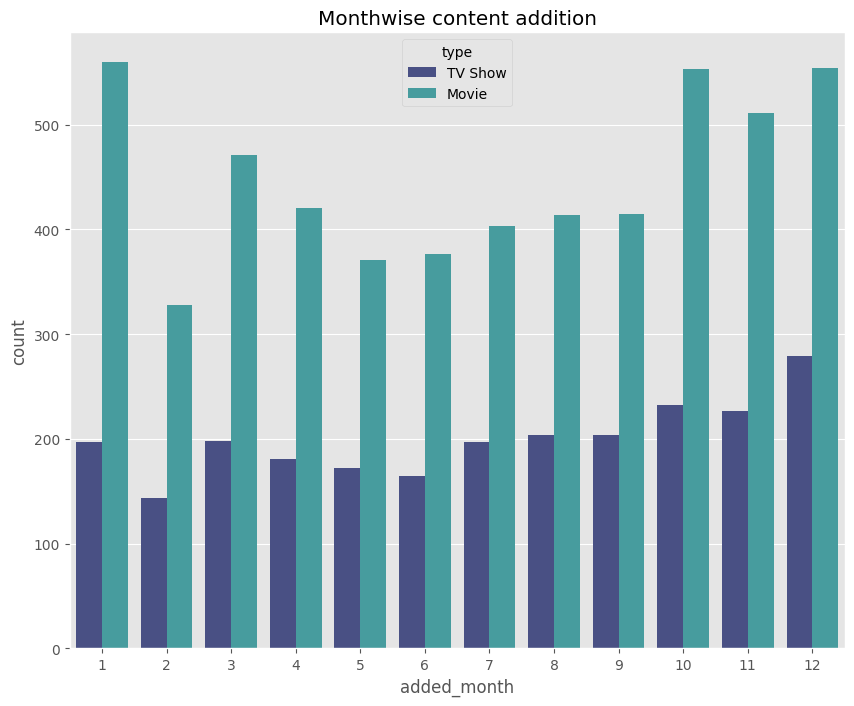

In [47]:
# Plotting a countplot for getting better insights from monthwise addition
plt.figure(figsize=(10,8))
sns.countplot(x='added_month',hue='type',data=df_1,palette = 'mako')
plt.title("Monthwise content addition")

we can clearly see that on **"January"**, **"October"** and in **"December"** there is more content added on netflix.

And in **"February"** very less amount of content added.

**Plotting Bar chart for checking how many movies/shows added on an avergae on days of evrey month**

Text(0.5, 1.0, 'Daywise content addition')

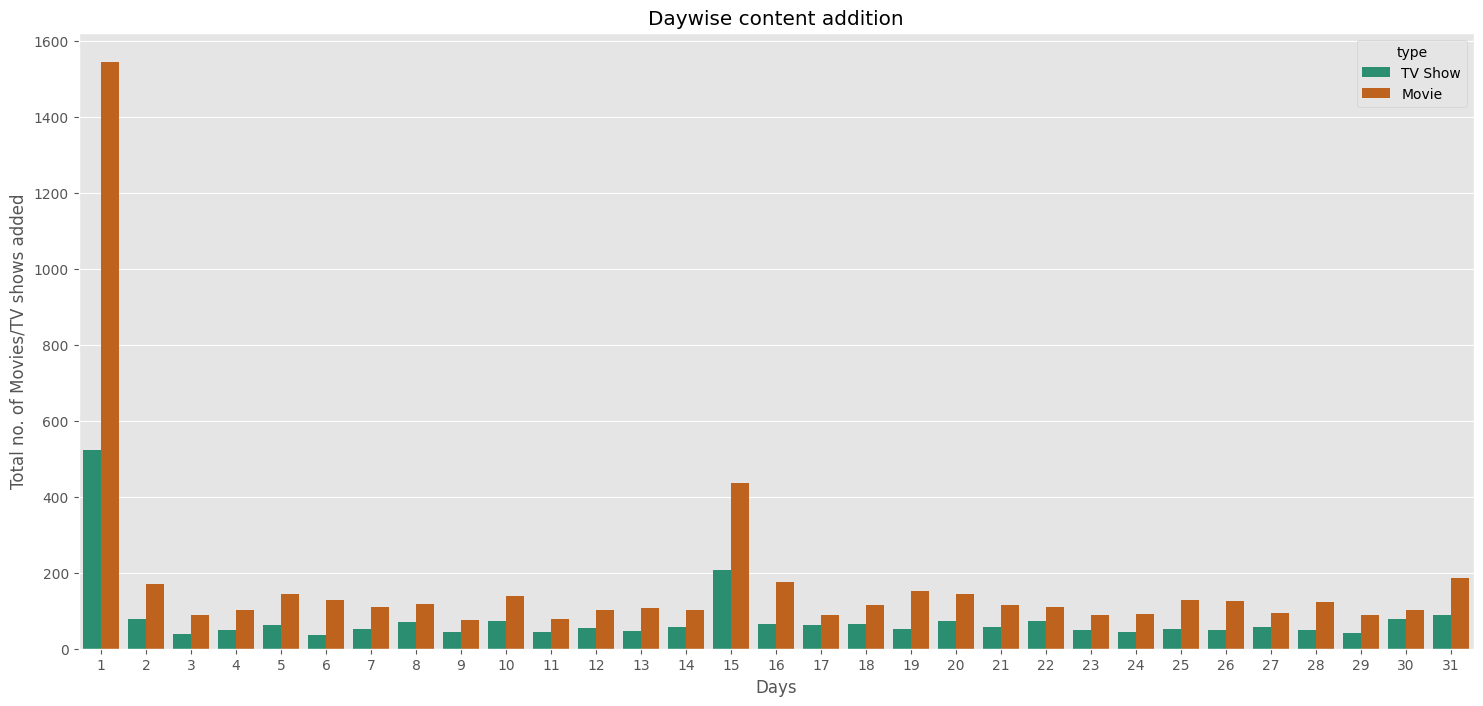

In [48]:
plt.figure(figsize=(18,8))
sns.countplot(x='added_day',hue='type',data=df_1,palette = "Dark2")
plt.xlabel('Days')
plt.ylabel('Total no. of Movies/TV shows added')
plt.title("Daywise content addition")

we can clearly spot the insights that netflix majorly add the content on the **1st day of every month**.

And there is another day which is **15th**, mid of the month which has second highest number of contents added on it.

## **Ratings**

### **Netflix Rating of Movies/TV Shows based on content:-**

**TV-MA** :for Mature Audiences

**R** : Restricted

**PG-13** : Parents strongly cautioned. May be Inappropriate for ages 12 and under

**TV-14** : Parents strongly cautioned. May not be suitable for ages 14 and under

**TV-PG** : Parental Guidance suggested

**NR** : Not Rated

**TV-G** : Suitable for General Audiences

**TV-Y** : Designed to be appropriate for all children

**PG** : Parental Guidance suggested

**G** : Suitable for General Audiences

**NC-17** : the content isn't suitable for children under 17 and younger

**TV-Y7-FV** : Suitable for ages 7 and up

**UR** : Unrated






In [49]:
# counting all type ratings
df_1.rating.value_counts().reset_index().rename(columns={'index':'Rating','rating':'Count'})

,Rating,Count
0,TV-MA,2861
1,TV-14,1928
2,TV-PG,804
3,R,665
4,PG-13,386
5,TV-Y,279
6,TV-Y7,270
7,PG,247
8,TV-G,194
9,NR,83


### **Rating Countplot**

Text(0.5, 1.0, 'Movies/TV shows - Rating wise')

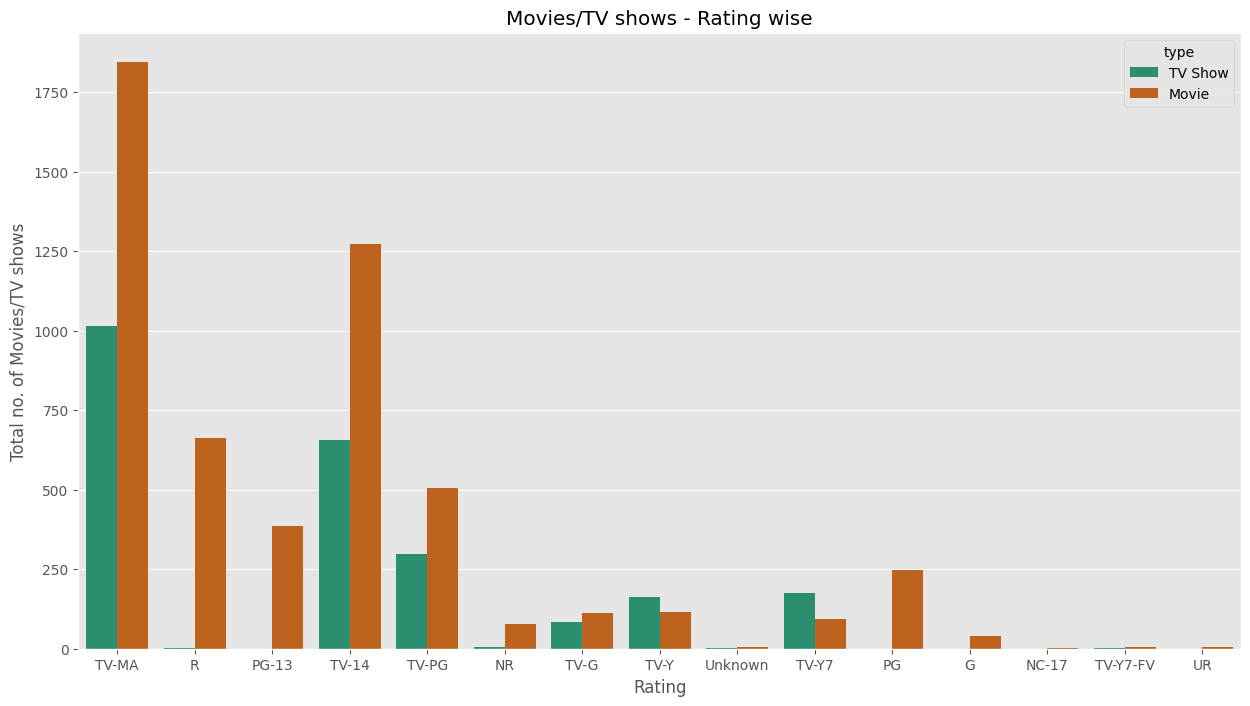

In [50]:
# Plotting a countplot to get in depth analysis from ratings
plt.figure(figsize=(15,8))
sns.countplot(x='rating',hue='type',data=df_1,palette = "Dark2")
plt.xlabel('Rating')
plt.ylabel('Total no. of Movies/TV shows')
plt.title("Movies/TV shows - Rating wise")

Here we can see that most content for **mature adults (TV-MA)** is more in both TV shows and Movies.

Then for **Under 14** which is **TV-14** is second highest in number, in which **parents are strongly cautioned.**


**G** rating which means **suitable for general audience** is rated to **very very less number of content**, which means there is **very less content which can suitable for everyone**.

## **Text Visualization**

We will work on Description column



In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

We will define a function to remove stop words

In [53]:
def delete_stopwords(description):
    '''
    This is function which will take the text data as input and delets the stopwords from it.
    '''

    # We will use a list comprehension
    clean_text = [i.lower() for i in description.split() if i.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(clean_text)

### **Cleaning Text**

In [54]:
# Now we will apply this function our 'Description' column

df_1['description']=df_1['description'].apply(delete_stopwords)
df_1['description'][0:2]

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city, trapp...
Name: description, dtype: object

okay, now we will remove punctuations

importing string

In [55]:
import string

In [56]:
# Defining a function to remove the punctuation
def remove_punctuations(text):
    '''
    This function takes input text and removes punctuation marks from it
    '''
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [57]:
# Now we will apply this function on 'Description' column
df_1['description']=df_1['description'].apply(remove_punctuations)

We removed the punctuation marks from decription column, now we will once check by calling some of the top rows

In [58]:
df_1['description'][0:6]

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
5    genetics professor experiments treatment comat...
Name: description, dtype: object

Now we will remove punctuations and stop_words from 'genres' column

In [59]:
# we will use count vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df_1['description'])
word_count = count_vectorizer.vocabulary_.items()

In [60]:
# we will make a list of word count
list_words = list(word_count)

We will now arrange the words with their occurences

In [61]:
# We will store the words and their counts in respective lists
words = []
counts = []
for key, value in word_count:
  words.append(key)
  counts.append(value)


In [62]:
# creating a dataframe for word counts
vocabulary = pd.DataFrame({"words":words,"counts":counts})
vocabulary = vocabulary.sort_values("counts",ascending=False)
vocabulary

,words,counts
18910,şeref,19646
10424,ōarai,19645
12415,łukasz,19644
11138,überelite,19643
11711,über,19642
...,...,...
8351,1000,4
646,100,3
7646,10,2
7993,009,1


In [63]:
# Resetting index and droping index column
vocabulary.reset_index(inplace=True)
vocabulary.drop(columns={"index"},inplace=True)

**Top 10 most occured words**

In [64]:
vocabulary[0:10]

,words,counts
0,şeref,19646
1,ōarai,19645
2,łukasz,19644
3,überelite,19643
4,über,19642
5,ömer,19641
6,émile,19640
7,ángel,19639
8,álvaro,19638
9,álex,19637


we will plot top 10 most occured words

In [65]:
top_10 = vocabulary.head(10)
top_10_words = top_10.words.values
top_10_word_count = top_10.counts.values

In [66]:
# array of top 10 words
top_10_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex'], dtype=object)

In [67]:
# count of top 10 words
top_10_word_count

array([19646, 19645, 19644, 19643, 19642, 19641, 19640, 19639, 19638,
       19637])

<BarContainer object of 10 artists>

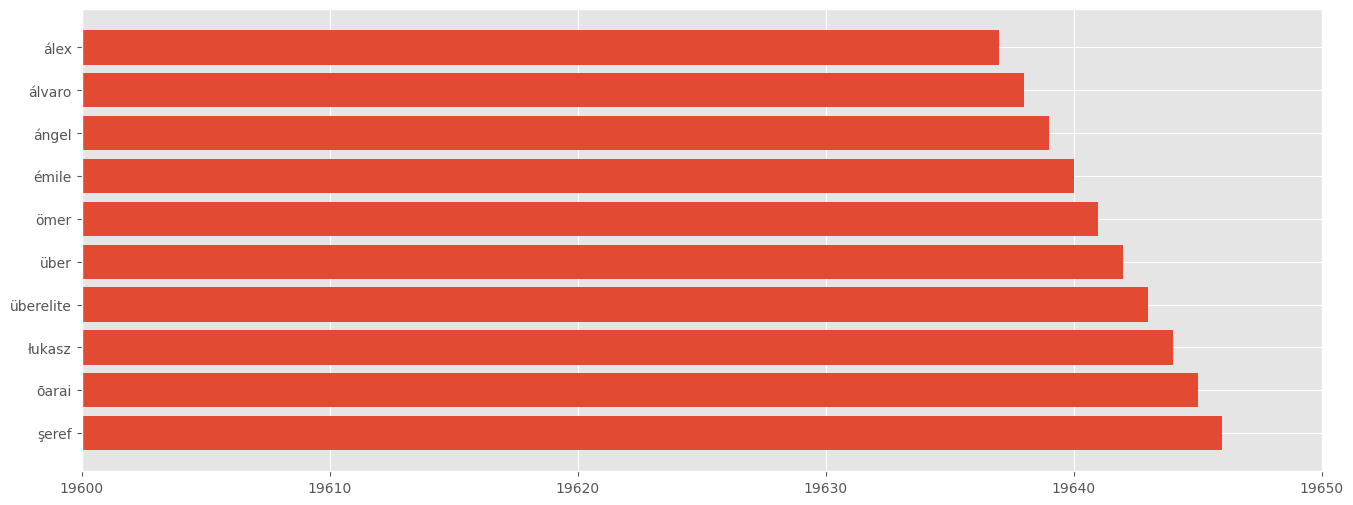

In [68]:
# Horizontal bar plot of top 10 most occured bar plot
plt.figure( figsize = ( 16,6 ))
plt.xlim(19600,19650,)
plt.barh(top_10_words , top_10_word_count )

### **Stemming**

As we can see that most words are from other langauges than english we will use **Snowball stemmer** -

The Snowball Stemmer can map non-English words too. Since it supports other languages the Snowball Stemmers can be called a multi-lingual stemmer.

In [69]:
# Stemming
stemming = SnowballStemmer("english")

In [70]:
# Defining a function for splitting the strings in description column and applying stemming on words and then joining them
def stemming_words(description):
    '''a function which stems each word in the given text'''
    description = [stemming.stem(word) for word in description.split()]
    return " ".join(description)

In [71]:
# Applying stemming function which is defined above on description column
df_1['description'] = df_1['description'].apply(stemming_words)

In [72]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df_1['description'])

# Collect the vocabulary items used in the vectorizer
vocabulary_1 = tfid_vectorizer.vocabulary_.items()

In [73]:
# Lists to store the vocab and counts
words_1 = []
count_of_words = []
# Iterate through each vocab and count append the value to designated lists
for key, value in vocabulary_1:
    words_1.append(key)
    count_of_words.append(value)

**Words after stemming**

In [74]:
# Creating a dataframe of words after stemming
words_after_stemming = pd.DataFrame({"Word":words_1,
                                     "Count":count_of_words})
words_after_stemming = words_after_stemming.sort_values("Count",ascending=False)

In [75]:
# Exploring top 10 most occured words in description column after stemming
top10_words_after_stemming = words_after_stemming.head(10)

In [76]:
top10_most_occured_stemmed_words = top10_words_after_stemming.Word.values
top10_count_of_most_occured_stemmed_words = top10_words_after_stemming.Count.values

In [77]:
top10_count_of_most_occured_stemmed_words

array([14280, 14279, 14278, 14277, 14276, 14275, 14274, 14273, 14272,
       14271])

**Top 10 most occured words after stemming**

<BarContainer object of 10 artists>

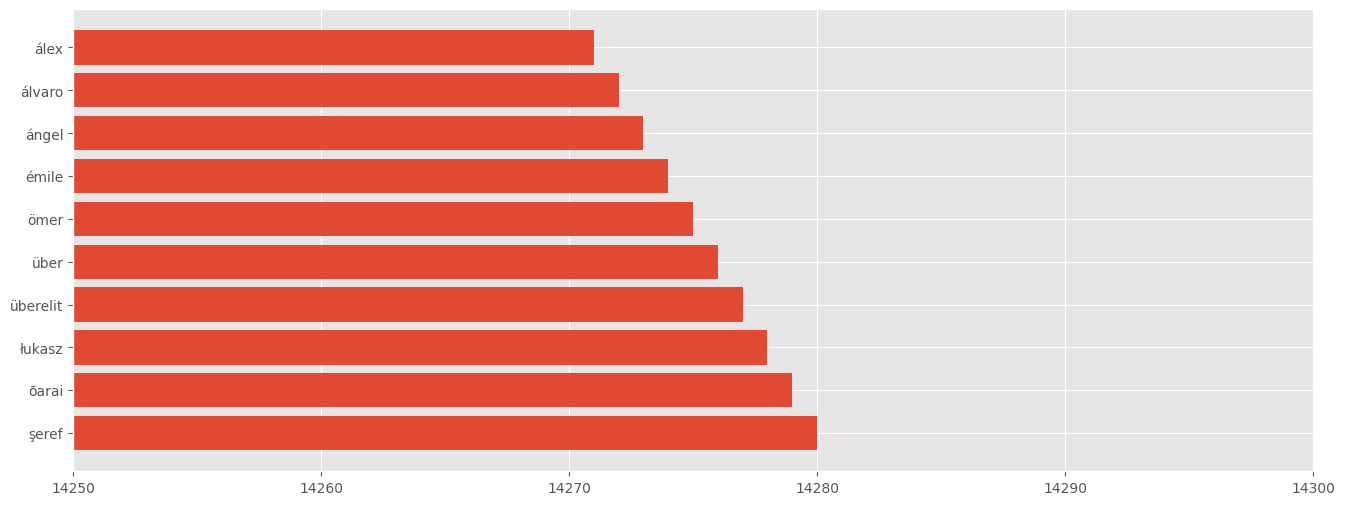

In [78]:
# plotting a horizontal bar chart
plt.figure( figsize = ( 16,6 ))
plt.xlim(14250, 14300)
plt.barh(top10_most_occured_stemmed_words , top10_count_of_most_occured_stemmed_words )

**In above bar chart we can see that most occured words are non-english.**

# **Multivariate Analysis**

# **2. Understanding what type content is available in different countries**

### **Exploring Countries**

In [79]:
# Creating a different country dataframe
country_count = df_1.copy()
country_count = pd.concat([country_count , df_1['country'].str.split(",",expand=True)],axis=1)


**splitting country columns as single observation contains multiple country names**

In [80]:
# stripping of the country column
country_count["country"] = country_count["country"].str.strip()

In [81]:
top_20_countries= country_count["country"].value_counts()[:20].reset_index().rename(columns={'index':'country','country':'count'})


**counting occurences of countries**

In [82]:
# counting occurences of countries by using value_counts
df['country'].value_counts()[:20]

United States                    2555
India                             923
United Kingdom                    397
Japan                             226
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Turkey                            100
Mexico                            100
Australia                          83
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Name: country, dtype: int64

<Axes: xlabel='country'>

<Figure size 1200x5000 with 0 Axes>

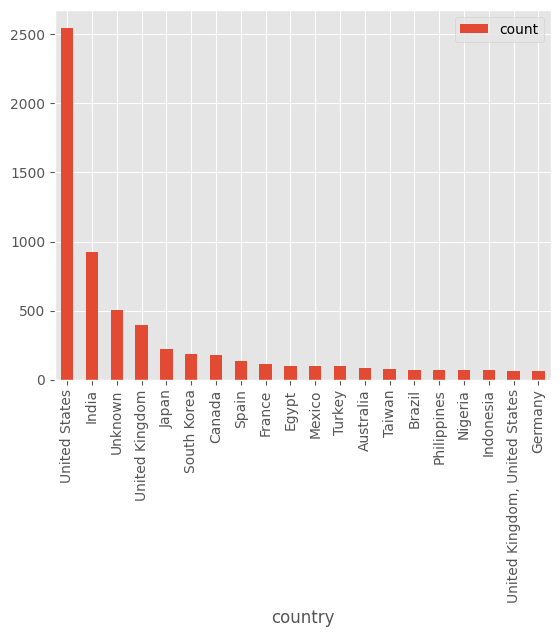

In [83]:
plt.figure( figsize = ( 12,50 ))
top_20_countries.plot(x="country", y="count", kind="bar")

### **Ratings VS Countries**

In [84]:
# defining a function
def barplot_rating(country_name):
  '''
  it will take a country name and return the rating count
  '''
  plt.figure(figsize=(8,6))
  from seaborn.categorical import countplot
  sns.set_theme(style="darkgrid")
  ax = sns.countplot(x='rating',data=country_count[country_count['country']==country_name])
  ax.set_title(country_name)

**Plotting the countplot for raings in top 20 countried**

In [85]:
# Converting country names to list using tolist
list_top20_countries = top_20_countries['country'].tolist()

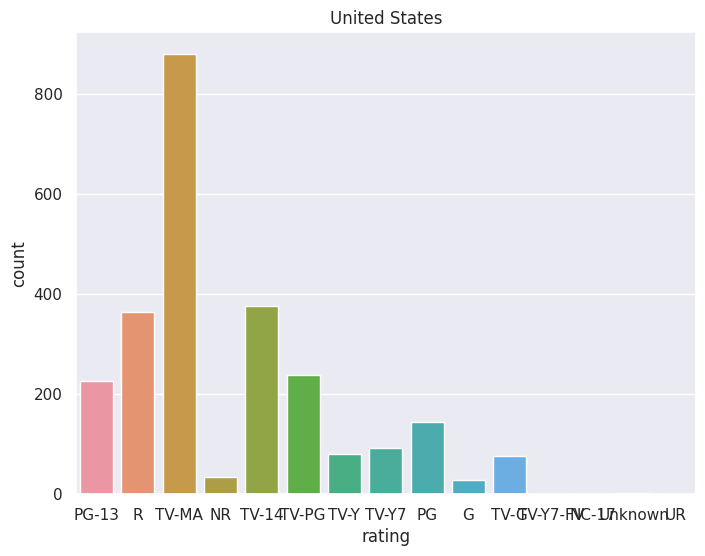

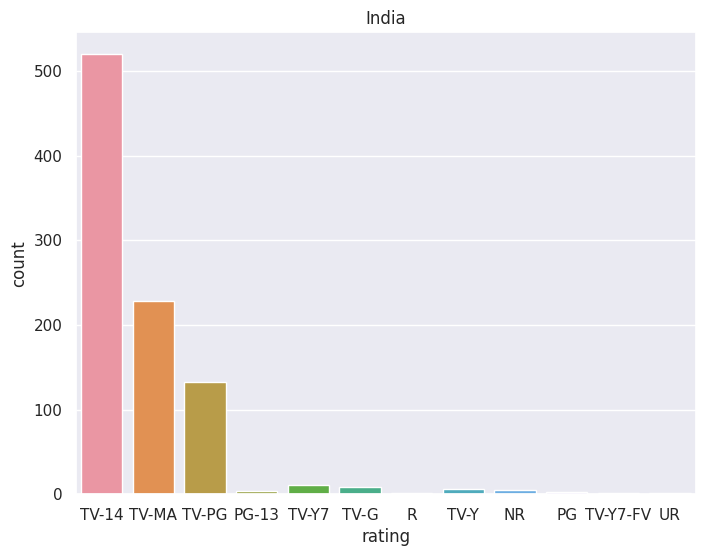

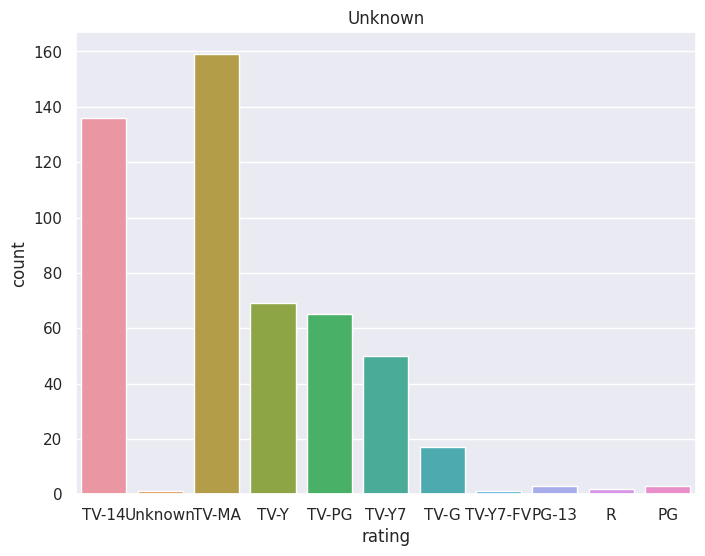

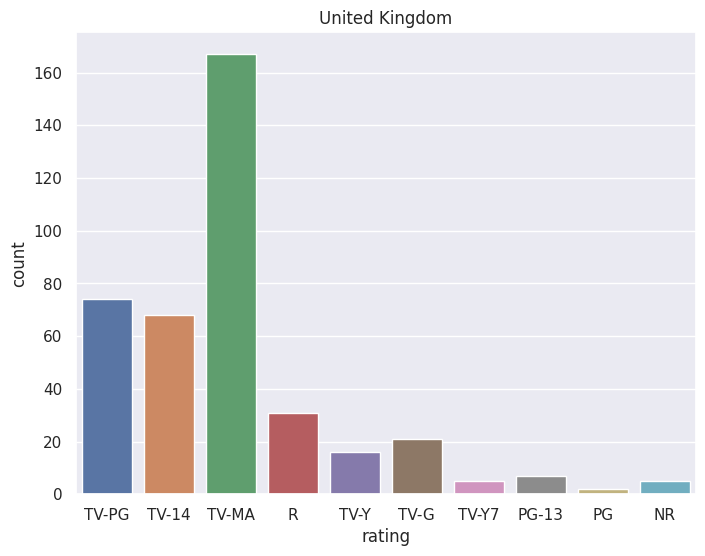

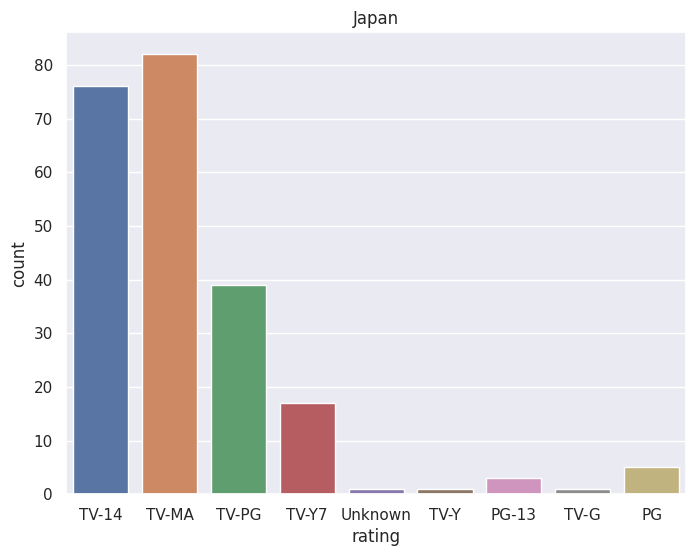

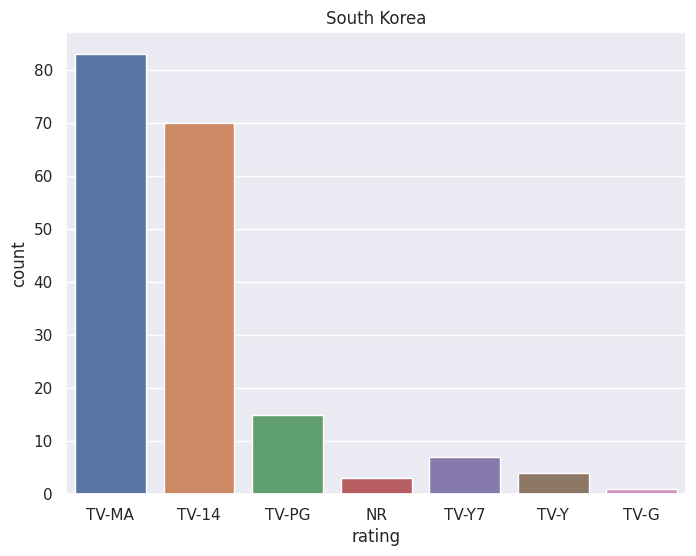

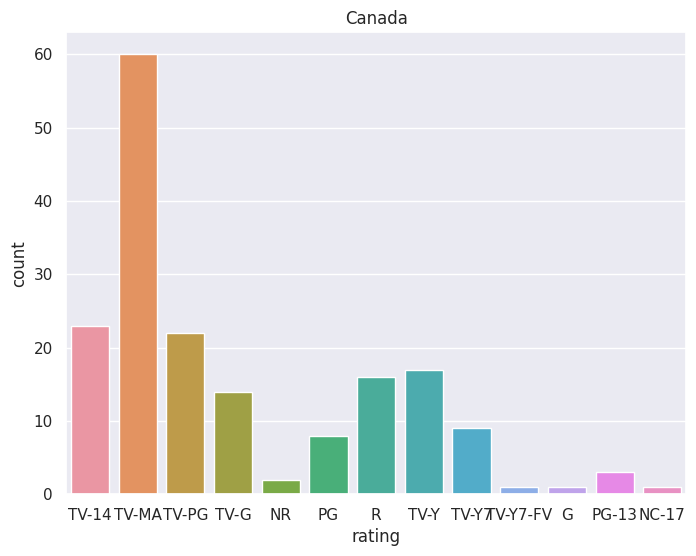

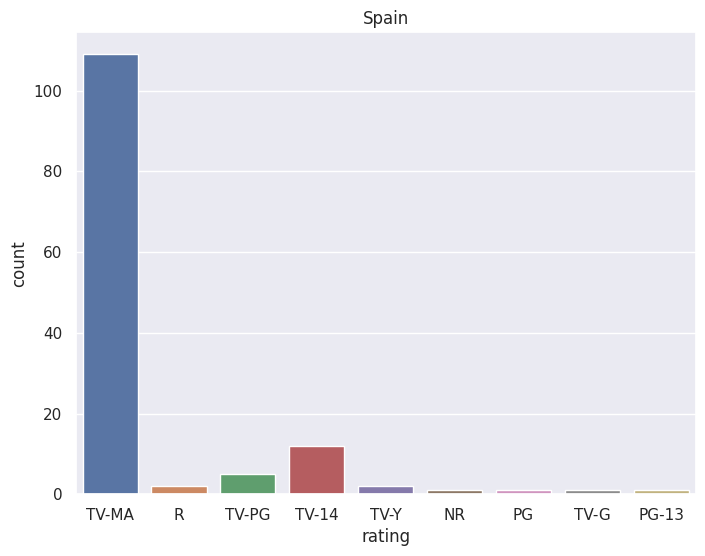

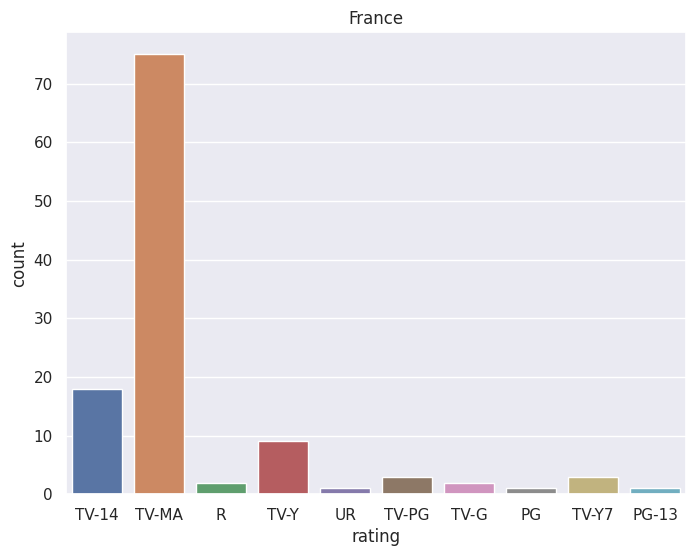

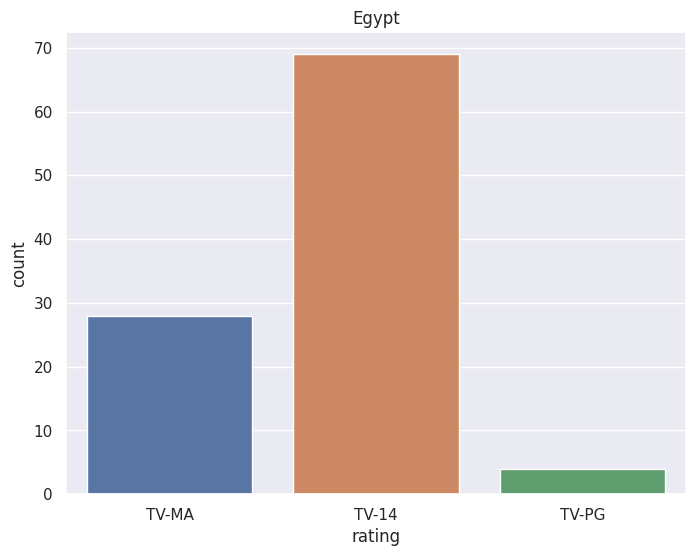

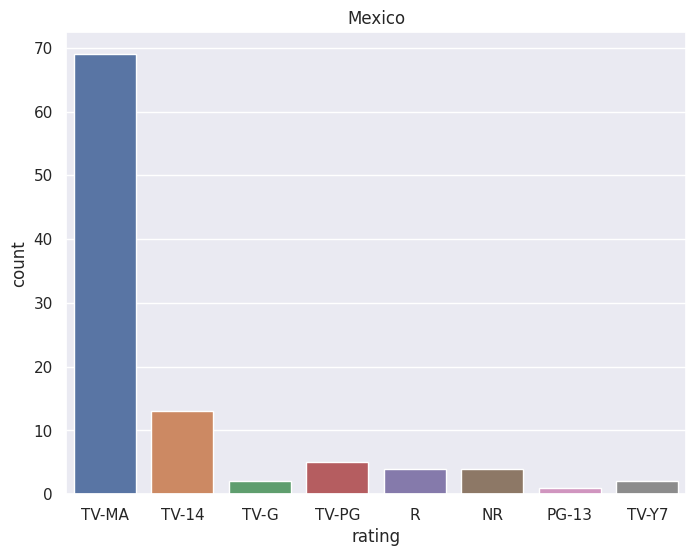

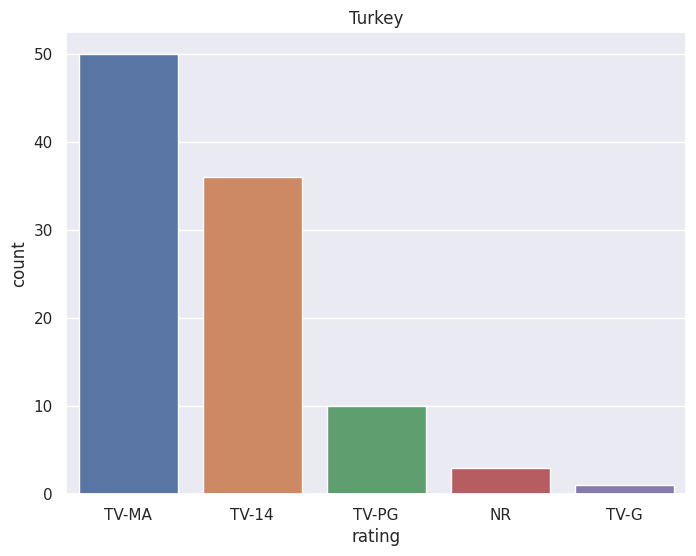

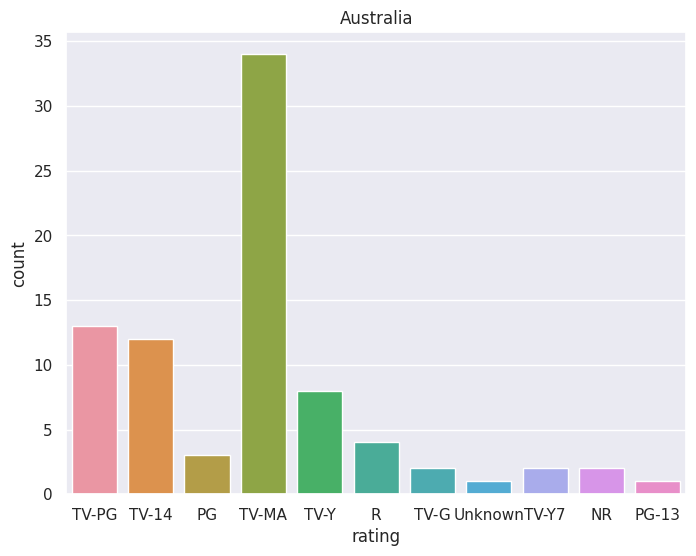

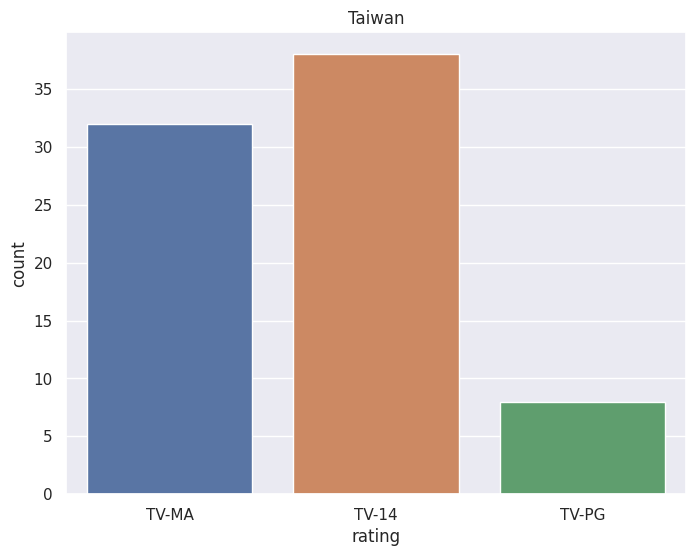

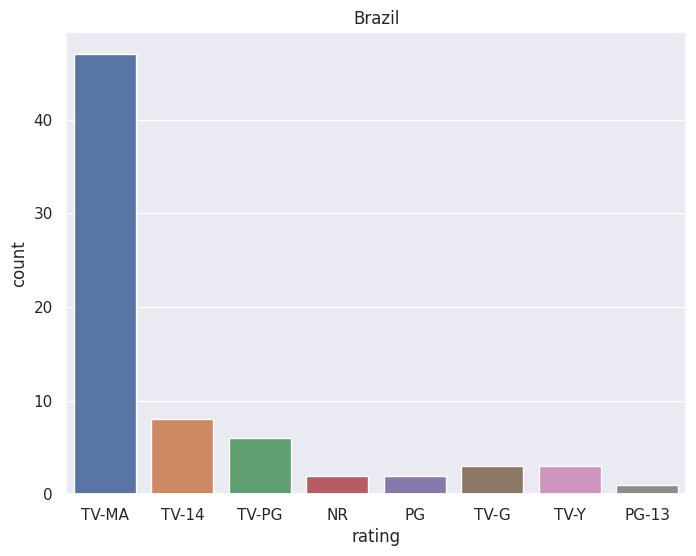

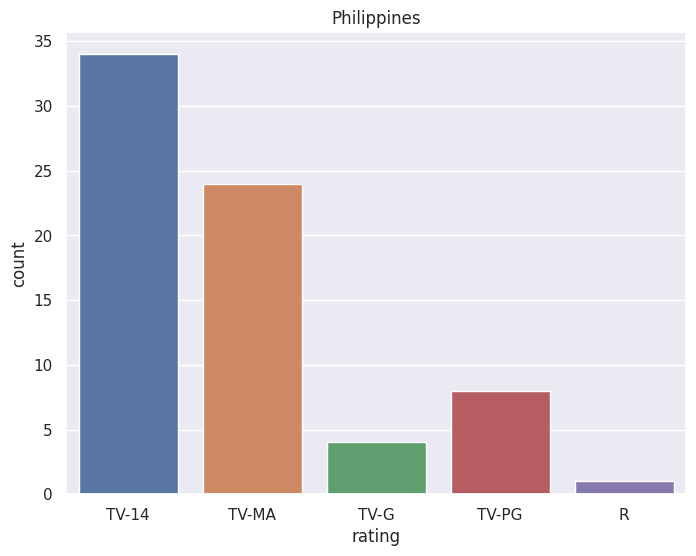

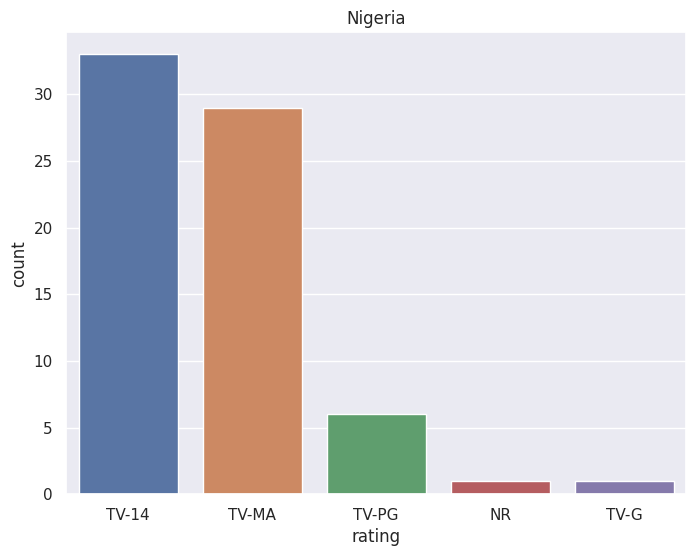

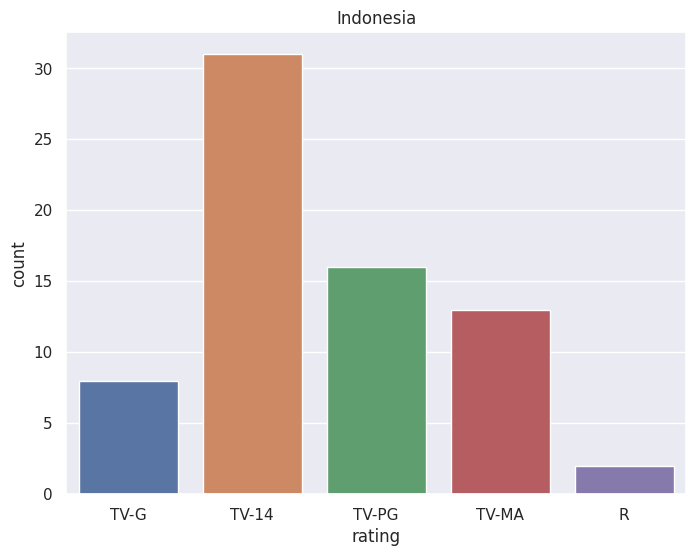

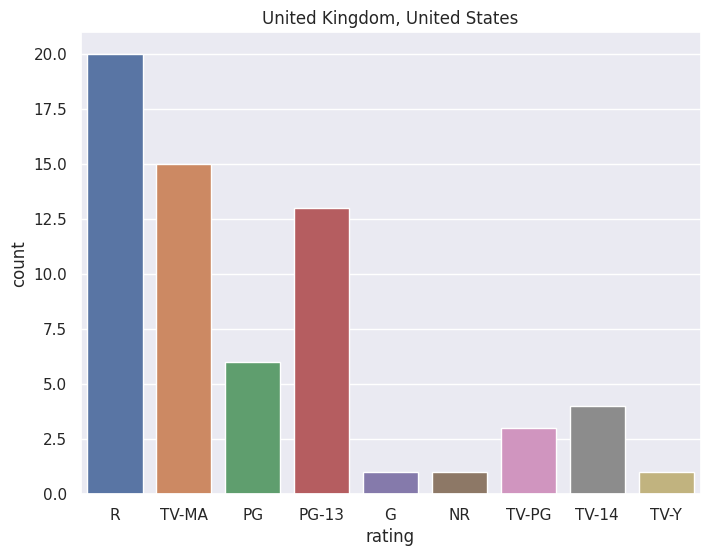

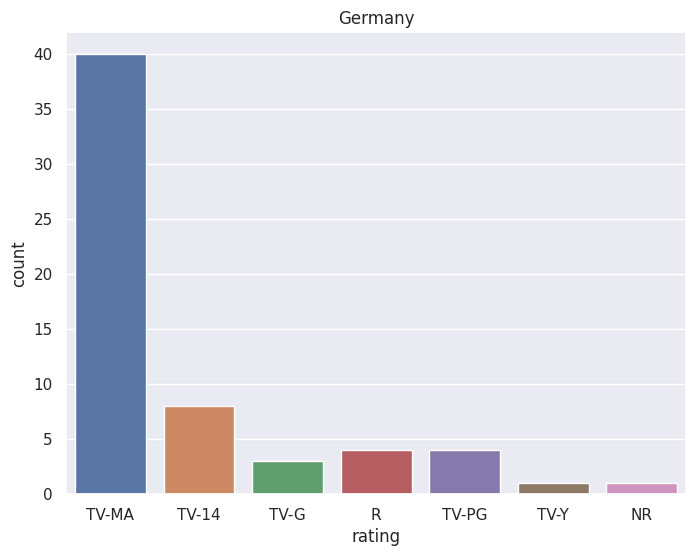

In [86]:
# Getting the country names one by one
for country_name in list_top20_countries:
  barplot_rating(country_name)

Here we can say that shows with **TV-MA** rating are highest in **Belgium, Brazil, Italy, Turkey, Australia, Mexico, Germany, South korea, Spain, Japan, France, Canada, United Kingdom, United States**

**India, China, Egypt, Hongkong and Taiwan** has higest number shows rated as **TV-14**

## **3.Is Netflix has increasingly focusing on TV rather than movies in recent years ??**

**Netflix's focus in recent years**

Text(0.5, 1.0, "Recent year Netflix's Uploads")

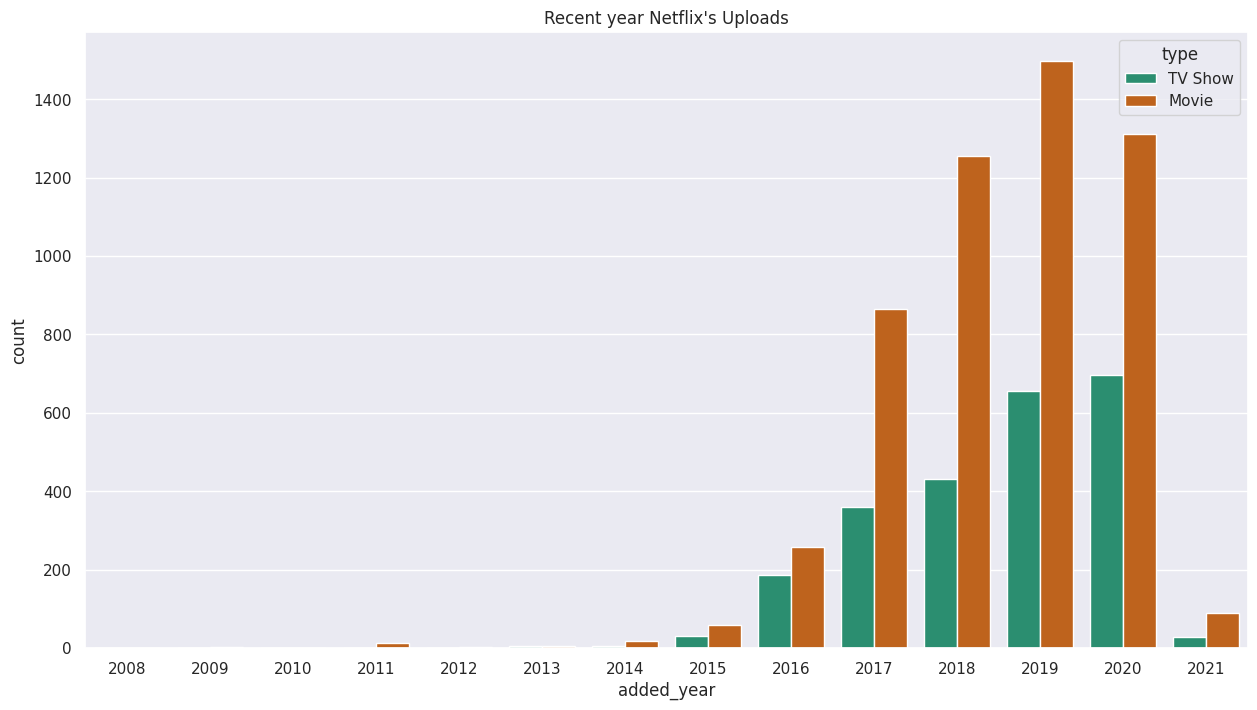

In [87]:
# Plotting a countplot
plt.figure(figsize=(15,8))
sns.countplot(x='added_year',hue='type',data=df_1,palette = "Dark2")
plt.title("Recent year Netflix's Uploads")

From above countplot we can clealry see that from 2017 number of Movies added increased tremendously, but at the same time TV shows added from 2017 are also increased but as comparison to Movies they are very less in numbers.

## **4. Clustering similar content by matching text-based features**

### **Feature Engineering**

we will add all text based or categorical columns

In [88]:
# We will add all categorical and text based columns
df_1['text_info'] = df_1['description'] + ' '+ df_1['genres'] + ' ' + df_1['rating'] + ' '+ df_1['country']+ ' ' + df_1['title'] + ' '+ df_1['director'] + ' ' + df_1['cast']

In [89]:
# Checking
df_1['text_info'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA Brazil 3% Unknown João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

**Text cleaning**

In [90]:
#text cleaning function
import re
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [91]:
# Applying above function on our combined column
df_1['text_info'] = df_1['text_info'].apply(clean_text)

In [92]:
# we will convert all words in lowercase
df_1['text_info'] = df_1['text_info'].str.lower()

In [93]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Stemming-**

In [94]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [95]:
# defining a function to filter the words
def filter_words(string, filter_words):
  filtered=[]
  tokens = word_tokenize(string)
  for word in tokens:
    if word not in filter_words:
      filtered.append(stemmer.stem(word))
  return filtered

df_1['cleaned_text']= ''
for item, row in df_1.iterrows():
  df_1.at[item,'cleaned_text'] = filter_words(row['text_info'],stop_words)

df_1['cleaned_text']



0       [futur, elit, inhabit, island, paradi, far, cr...
1       [devast, earthquak, hit, mexico, citi, trap, s...
2       [armi, recruit, found, dead, fellow, soldier, ...
3       [postapocalypt, world, ragdol, robot, hide, fe...
4       [brilliant, group, student, becom, cardcount, ...
                              ...                        
7782    [lebanon, civil, war, depriv, zozo, famili, he...
7783    [scrappi, poor, boy, worm, way, tycoon, dysfun...
7784    [documentari, south, african, rapper, nasti, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentari, delv, mystiqu, behind, bluesrock...
Name: cleaned_text, Length: 7777, dtype: object

In [96]:
#join words fun
def join_words(x):
  return " ".join(x)

In [97]:
#final column
df_1['cleaned_text'] = df_1['cleaned_text'].apply(join_words)

In [98]:
words = df_1.cleaned_text

## **TF-IDF**

**Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.**

**TF** - The term frequency is the number of occurrences of a specific term in a document. Term frequency indicates how important a specific term in a document. Term frequency represents every text from the data as a matrix whose rows are the number of documents and columns are the number of distinct terms throughout all documents.

**IDF** - Document frequency is the number of documents containing a specific term. Document frequency indicates how common the term is.Inverse document frequency (IDF) is the weight of a term, it aims to reduce the weight of a term if the term’s occurrences are scattered throughout all the documents.


In [99]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X= t_vectorizer.fit_transform(words)

In [100]:
X

<7777x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 257532 stored elements in Compressed Sparse Row format>

### **Applying PCA-Principal Component Analysis to reduce dimensions.**

**PCA- Pricipal Component Analysis**

Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation.

It is a technique to draw strong patterns from the given dataset by reducing the variances.

PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.

In [ ]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

### **Cumulative Explained Variance**

In [ ]:
 #explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


**here we can clearly spot that 80% variance is explained by 3000 components only.**

We will use 3000 components

In [ ]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 3000
from sklearn.decomposition import PCA
transformer = PCA(n_components=3000)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

In [ ]:
# vectorizing the test and train
X_vectorized = t_vectorizer.transform(words)

In [ ]:
#applying pca
X= transformer.transform(X_vectorized.toarray())

In [ ]:
X

# **KMeans Clustering**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

**Silhouette Score Elbow for KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

### **Elbow Method to get number of clusters**

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

In [ ]:
# We will plot the graph to get the no. of clusters
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**we will take no. of clusters as 15**

### **Model fitting**

In [ ]:
# fitting the k means algorithm on lower features

kmeans= KMeans(n_clusters=15, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)

**calculating silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X, kmeans.labels_))

**Predicting**

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X)

In [ ]:
#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

**we now assign our clusters in our dataset by creating a new column "clusters"**

In [ ]:
# Assigning clusters to our data
df_1['clusters'] = kmeans.labels_

In [ ]:
# checking how it is working
df_1.head()

**Counting Movies/TV shows assigned to each cluster**

In [ ]:
# COunting content in each cluster
cluster_content_count = df_1['clusters'].value_counts().reset_index().rename(columns={'index':'clusters','clusters':'Movies/TV_Shows'})
cluster_content_count

### **Silhouette Score -**
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

In [ ]:
import matplotlib.cm as cm

In [ ]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**we selected number of clusters as 15 which in above calculations showing 0.00708 as silhouette score.**

# **Conclusion**

**1. In cumulative explained variance graph we got 80% of variance captured by 3000 components only, thats why we selected no. of components as 3000.**

**2. We selected no. of clusters as 15 from Elbow method.**

**3. Calculated silhouette score for 15 no. of clusters which was showing 0.008**

**4. Then we applied KMeans on our data and then we predict the labels.**

**5. we plotte word cloud for each cluster so that we can visualize the summary of each cluster.**

**6. Then we plotted average silhouette score for clusters ranging from 2 to 16, and in that we get silhouette score 0.00708 for cluster=15 which is pretty close to earlier we calculated.**

# **Limitations**

**1. As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any feature.**

**2. Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored.**

**3. More Computational power required.**

**4. k-means has trouble clustering data where clusters are of varying sizes and density.**

# **Future Scope**

**1. With more computational power can work on more data.**

**2. Can apply different clustering algorithms.**

# **Thank You**